# Lab - Module 6 - Solution

In [1]:
% matplotlib inline

## Directions

**Failure to follow the directions will result in a "0"**

The due dates for each are indicated in the Syllabus and the course calendar. If anything is unclear, please email EN605.448@gmail.com the official email for the course or ask questions in the Lab discussion area on Blackboard.

The Labs also present technical material that augments the lectures and "book".  You should read through the entire lab at the start of each module.

### General Instructions

1.  You will be submitting your assignment to Blackboard. If there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.
    
    * do **not** use absolute paths in your notebooks. All resources should appear in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    
2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. It should say `In [1]` for the first codecell and increase by 1 throughout.

## Exploratory Data Analysis

In this Module, we partitioned our problem using a Taxonomy with the following characteristics:

* **Data Type**: Numerical or Categorical.
* **Number of Variables**: 1 or many.
* **Technique**: descriptive statistics, tables or charts.

we will skip "goal" for now.

And we came up with a general set of tools for analyzing data, not all of them applicable to all the cases:

* Descriptive Statistics
* Frequency Table (absolute and relative)
* Histograms
* Box-and-Whiskers Plot
* Bar chart
* Dot chart
* Heat map
* Scatter Plot

This does not exhaust all the chart types, though. We also have the following basic chart types that we talked about in the Visualization Module:

* Points
* Lines
* Lines and points

We also mentioned that we might need to apply both modes and several different charts to uncover various relationships in our data.

The goal for this lab is to get you acquainted with most of these tools in both their ideal setting and in the less than ideal setting. In a previous Lab, you learned how to generate synthetic data. You're going to put that skill to good use. You will be generating data from various distributions: bi/multinomial, normal, poisson, exponential, etc. 

In general, we want to see how well the various modes work, especially the graphical modes, when:

1. You have a lot of perfect data. For example, what does a histogram look like when you sample from a normal distribution with $\mu=32.5$ and $v=25\%$ with 10,000 observations?
2. You have either imperfect data or not a lot of it. Now what happens when you have $v=1\%$ and 62 observations? What happens when there is a hidden variable that makes your data $X_1$ the combination of $\mu_1=32.5$, $v_1=5\%$ and $\mu_2=34.2$ and $v=3\%$?

Not only will these get you acquainted with the various techniques but it will also demonstrate just how important domain knowledge is.

And for each case, try different modes. What does a histogram tell you that a box-and-whiskers plot does not and vice versa? What about different bin sizes?

And the most important bit: you must write something for every single chart you produce. The emphasis here is on *science*. At every juncture, you must say:

1. **Why am I trying this?** "I'm going to look at this data using a box and whiskers plot to explore its general shape." "I am trying more bins to see if the histogram reveals any interesting characteristics."
2. **Do it.**
3. **What did I learn?** "Although I know the data is generated from a normal distribution, it doesn't look normally distributed. The sample mean is X while the true mean is Y."

In EDA, you should generally never just *change* anything. You should copy your code, explain why you're making some change to the parameters, make the change and then note what happens.

Be inventive and creative.

In [2]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

sns.set(style="whitegrid")

## Guided Example

Assume you have data for a numerical variable $X_1$ with following (unknown to you) characteristics:

$\mu=32.5$

$v=25\%$ (remember this is the **coefficient of variation** not the variance)

We're going to start off easy:

1. Calcualte the descriptive statistics.
2. Plot a histogram with default bins.
3. Make a box and whiskers plot with a data overlay.

with $n$ = 50.

**Step 1. Generate the synthetic data. For real EDA, this step is obtain and clean the data.**

We can use the `to_std` function from past Labs to convert the coefficient of variation to a standard deviation.

In [3]:
def to_std( mu, v):
    return mu * v

Set the random seed for this experiment.

In [4]:
np.random.seed([17246465])

It's very convenient to have our data in a Panda's DataFrame:

In [5]:
mu = 32.5
s = to_std( mu, 0.25)

data = pd.DataFrame({"x1": np.random.normal( mu, s, 50)})

**Step 2. Summaries and Charts**

Everything in italics is like a voiceover explanation of why you're doing something...it's not something you would put in an actual report.

*The data is synthetic but it doesn't matter. These techniques are like little machines that take data in and spit something out, a chart or a descriptive statistic. The interesting part for right now is that you know where the data came from. When you do this for real, you won't know The Truth at all.*

*Let's start with "x1" which is "$x_1$ with coefficient of variation equal to 25 percent". Let's imagine that this was 50 data points that we just collected somehow and that we have already cleaned them. The first thing we want to do is get sense for our data which might involve just printing out the usual parameteric and non-parametric descriptive statistics.*

*Of course, in the real world, you kind of have to say something about why your doing this and interpret the results. Here we can go with a little bit of boiler plate.*

$x_1$ is an important variable to this problem. We start our analysis with descriptive statistics:

In [6]:
data["x1"].describe()

count    50.000000
mean     31.752356
std       9.551102
min       5.195836
25%      27.228962
50%      31.649145
75%      37.528273
max      52.767789
Name: x1, dtype: float64

The mean is 31.75 with a standard deviation of 9.55 (a coefficient of variation of 30.0%). The mean and median are about the same 31.75 versus 31.65 which suggests a symmetric distribution. The range is 47.57. The interquartile range is 10.29.

*For a real variable, we'd have context (domain knowledge) for those values. Is the mean what we expected? Is it high or low? Is that a big range? You also need to be inquisitive. If you just copy the sentences above for the rest of this assignment, you've missed the point. You need to **explore** and I can't enumerate all the possible ways you can do that. You need to forget a little bit about how the data came to be and just look at it.*

The descriptive statistics for $x_1$ will not necessarily show the whole story so we're going to plot a histogram of the data:

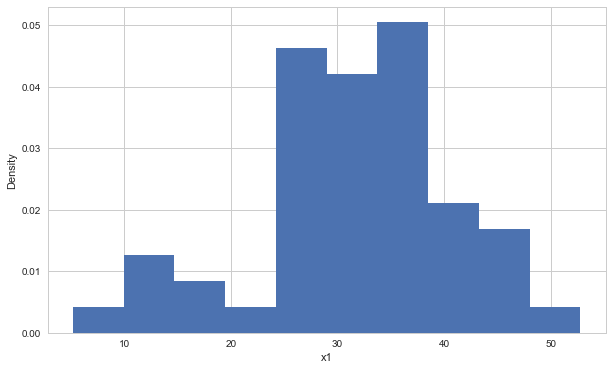

In [7]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist( data[ "x1"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "x1")

plt.show()
plt.close()

While the mean and median are the nearly the same, suggesting a normal distribution, the histogram does not seem to indicate that the data is normally distributed. While there is a peak around 32.5, around the mean, the left hand side of the distribution seems to be missing, although with a small peak. We might need to get more data to ascertain what would be a good distributional model for this data.

*At this point, you should fiddle around with the bin sizes a bit. It might reveal more structure to the data.*

*Make sure you change variable names when you copy and paste code from other sources or previous notebooks*

We're going to take a different view of the data's distributional shape by plotting a box-and-whisker's chart with the actual data overplotted:

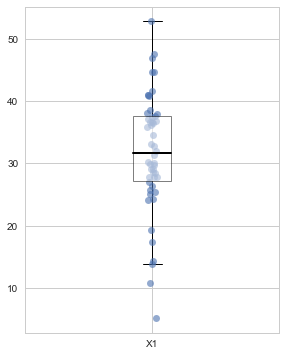

In [8]:
def restyle_boxplot( patch):
    ## change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    ## change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    ## change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    ## change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)
    
    for box in patch["boxes"]:
        box.set( facecolor='#FFFFFF', alpha=0.5)
    
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 2, 1)

patch = axes.boxplot( data[ "x1"], labels=["X1"], patch_artist=True)
restyle_boxplot( patch)

x = np.random.normal(1, 0.01, size=len(data["x1"]))
axes.plot(x, data[ "x1"], 'o', alpha=0.6)

plt.show()
plt.close()

The box-and-whisker's chart is fairly well balanced, the median is near the middle of the box. The non-parametric statistics (Q1, median, Q3) suggest a fairly normal distribution. Although there appear to be several extreme values at the lower end of the distribution.

*Box-and-whisker plots when they include the data are very nice in many cases for showing how the data corresponds to the summary statistics. The top of the whisker is $1.5 \times IQR$, the bottom of the whisker is $1.5 \times IQR$. The top of the box is `75%` (3rd quartile) and the bottom of the box is `25%` (1st quartile). The line in the box is the median (`50%`). They are also very nice for comparing many distributions, especially for each value of another categorical variable.*

*As mentioned in the Text, there is no generally accepted definition of "outlier" so we use the term, "extreme value". These may require some special investigation.*

## Exercises

For all exercises, you should:

1. Calculate parametric and non-parametric descriptive statistics,
2. Plot several histograms with different bins sizes.
3. Plot a box-and-whiskers chart with and without overlaying the actual data points.

Always describe what you're doing, why and the result.

**Experiment 1**

Repeat the Guided Example but change the random seed. What happened?

We just need to change the random seed to anything and we don't have to change the seed by much (as the results should be uncorrelated with the seeds or it's not a good RNG:

In [9]:
np.random.seed([17246466]) # <-- change this and re-analyze

We have to be a little careful of global variables in Notebooks. I'm going to define mu and s again so that we know for sure that they're not getting changed between here and above. I'm going to add the new data to the old data frame so that we can compare it. I'm going to call the new variable "x1v2" for $x_1$, version 2.

In [10]:
mu = 32.5
s = to_std( mu, 0.25)

data["x1v2"] = np.random.normal( mu, s, 50)

As before we can use `describe` to get the descriptive statistics for the variable:

In [11]:
data.describe()

,x1,x1v2
count,50.000000,50.000000
mean,31.752356,33.972714
std,9.551102,8.133156
min,5.195836,7.109923
25%,27.228962,29.646036
50%,31.649145,35.716402
75%,37.528273,38.783237
max,52.767789,46.289113


Just looking at the descriptive statistics, it's easy to believe that these two data sets come from the same underlying process. It's interesting to note that the range is smaller for the second dataset, the mean is higher, the median is higher but the max is smaller. Overall, the second data set is less disperse.

*You almost certainly got different results based on your different random seed. The main point here is that we know the process is the same but we get different and sometimes **very** different results for repeat sample.*

I'm going to repeat histograms for each sample:

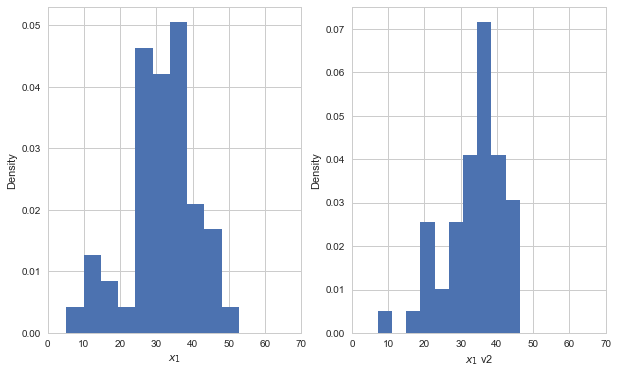

In [12]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( data[ "x1"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$")
axes.set_xlim([0, 70])

axes = figure.add_subplot(1, 2, 2)
axes.hist( data[ "x1v2"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$ v2")
axes.set_xlim([0, 70])


plt.show()
plt.close()

Of course, usually you won't have two datasets from the same source in real life so what is the lesson we need to take away from this exercise?

1. The underlying distribution can give rise to a lot of different shapes that don't necessarily look like the underlying distribution.
2. You still have to work with the data you have. In the first case ($x_1$) the data seems to suggest that there might be a small influence from another variable on the smaller values. In the second case ($x_1$ v2) we don't see this. Therefore if you collected the first sample, looking for that variable might succeed or fail: you might be chasing a ghost. In the second case, you might miss something important because you don't have enough data.

I'm going to try more bins. Does the artifact at the lower end survive?

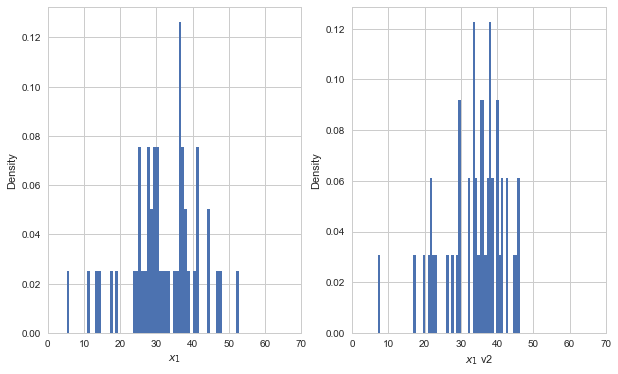

In [13]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( data[ "x1"], normed=True, bins=60)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$")
axes.set_xlim([0, 70])

axes = figure.add_subplot(1, 2, 2)
axes.hist( data[ "x1v2"], normed=True, bins=60)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$ v2")
axes.set_xlim([0, 70])


plt.show()
plt.close()

With fewer bins, the second "bump" in the first data set looks more like it could just be a long tail of data. This is why it's important to try different bin sizes. Let's try fewer bins:

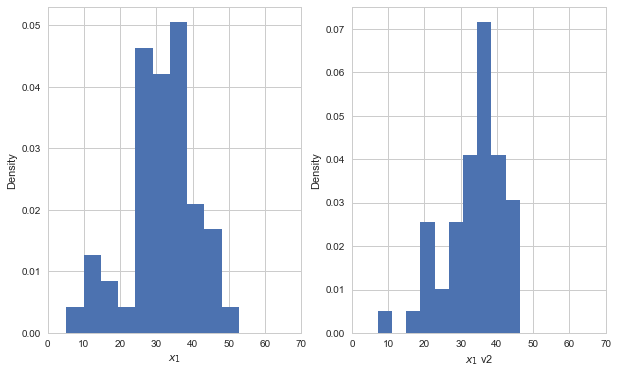

In [14]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( data[ "x1"], normed=True, bins=10)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$")
axes.set_xlim([0, 70])

axes = figure.add_subplot(1, 2, 2)
axes.hist( data[ "x1v2"], normed=True, bins=10)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$ v2")
axes.set_xlim([0, 70])

plt.show()
plt.close()

What we would like to see with fewer bins is a kind of "squinting" effect that smooths over the rough edges. The persistence of that "bump" in $x_1$ v1 could be misleading. You will sometimes be mislead.

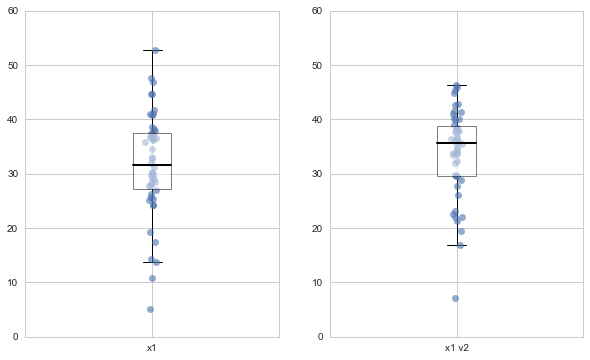

In [15]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 2, 1)

patch = axes.boxplot( data[ "x1"], labels=["x1"], patch_artist=True)
restyle_boxplot( patch)

x = np.random.normal(1, 0.01, size=len(data["x1"]))
axes.plot(x, data[ "x1"], 'o', alpha=0.6)
axes.set_ylim([0, 60])

axes = figure.add_subplot(1, 2, 2)

patch = axes.boxplot( data[ "x1v2"], labels=["x1 v2"], patch_artist=True)
restyle_boxplot( patch)

x = np.random.normal(1, 0.01, size=len(data["x1"]))
axes.plot(x, data[ "x1v2"], 'o', alpha=0.6)
axes.set_ylim([0, 60])

plt.show()
plt.close()

Again, because we rarely get two datasets from the same source (we would just combine the data), the goal here is really just to say "whatever conclusion you draw, realize that you're working with 50 observations and you could have gotten 50 different ones".

** Experiment 2 **

Repeat the Guided Example with 1,000 observations. What happened?

This time we cannot use the same Data Frame. We'll call it `data2` but still call the new variable `x1v3`:

In [16]:
np.random.seed([17246465])

In [17]:
mu = 32.5
s = to_std( mu, 0.25)

data2 = pd.DataFrame({"x1v3": np.random.normal( mu, s, 1000)})

I'm going to do a bit of "black magic". The data structure returned by `describe` is itself a Data Frame so we can combine the results to two `describe` calls:

In [18]:
result1 = data.describe()
result2 = data2.describe()
combined = result1.join( result2)
combined[["x1", "x1v3"]]

,x1,x1v3
count,50.000000,1000.000000
mean,31.752356,32.469352
std,9.551102,8.106595
min,5.195836,5.195836
25%,27.228962,27.193502
50%,31.649145,32.504833
75%,37.528273,37.930770
max,52.767789,56.091901


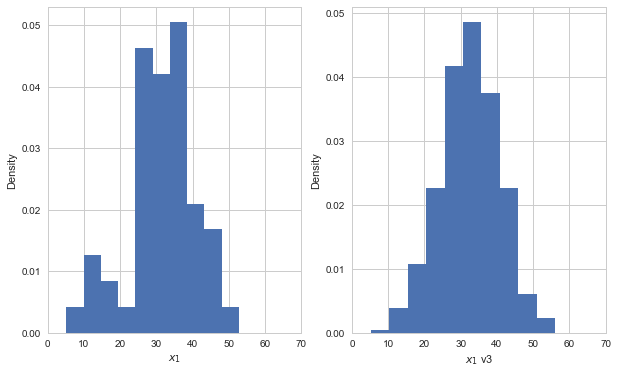

In [19]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( data[ "x1"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$")
axes.set_xlim([0, 70])

axes = figure.add_subplot(1, 2, 2)
axes.hist( data2[ "x1v3"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$ v3")
axes.set_xlim([0, 70])


plt.show()
plt.close()

It just doesn't take much more data (1,000 isn't really that much anymore) for the underlying distribution to emerge pretty clearly...other things being equal as we'll see in the next Experiment.

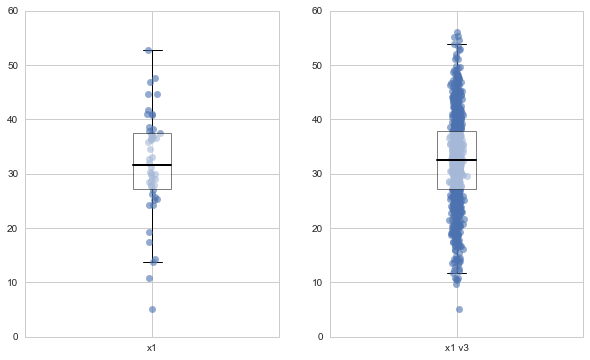

In [20]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 2, 1)

patch = axes.boxplot( data[ "x1"], labels=["x1"], patch_artist=True)
restyle_boxplot( patch)

x = np.random.normal(1, 0.01, size=len(data["x1"]))
axes.plot(x, data[ "x1"], 'o', alpha=0.6)
axes.set_ylim([0, 60])

axes = figure.add_subplot(1, 2, 2)

patch = axes.boxplot( data2[ "x1v3"], labels=["x1 v3"], patch_artist=True)
restyle_boxplot( patch)

x = np.random.normal(1, 0.01, size=len(data2["x1v3"]))
axes.plot(x, data2[ "x1v3"], 'o', alpha=0.6)
axes.set_ylim([0, 60])

plt.show()
plt.close()

You will almost certainly never see data "in the wild" this perfect and beautiful. In any case, we draw the same lesson here. Other things being equal, we increasing sample size improves our understanding of the data shapes. This is really just another way of talking about the Law of Large Numbers (which we harness for the Bootstrap).

**Experiment 3**

Repeated the Guided Example with 1,000 observations but with $v=50\%$. What happened?

For this experiment we start to see what happens when "other things" are *not* "equal". We're going to increase the dispersion of our data quite a bit. The question is, does the increase in dispersion offset the sample size? The other question you should ask yourself is, if this doesn't make a difference, how much do we need to increase the dispersion before we do see a difference. These are the kinds of questions these experiments should bring to mind and that you should be doing on your own. You have an infinite lab at your disposal unlike, say, physicists.

In [21]:
np.random.seed([273652])

In [22]:
mu = 32.5
s = to_std( mu, 0.50)

data2["x1v4"] = np.random.normal( mu, s, 1000)

In [23]:
data2.describe()

,x1v3,x1v4
count,1000.000000,1000.000000
mean,32.469352,33.025260
std,8.106595,16.370719
min,5.195836,-27.516294
25%,27.193502,22.144283
50%,32.504833,32.710046
75%,37.930770,44.271415
max,56.091901,81.665689


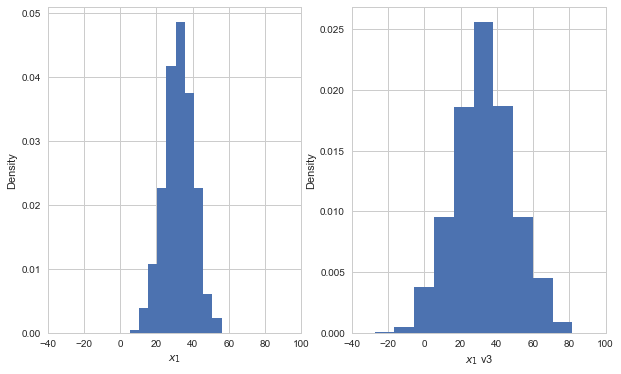

In [24]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist( data2[ "x1v3"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$")
axes.set_xlim([-40, 100])

axes = figure.add_subplot(1, 2, 2)
axes.hist( data2[ "x1v4"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$ v3")
axes.set_xlim([-40, 100])


plt.show()
plt.close()

It would appear that increasing the dispersion to 50% of the mean is not sufficient to outweigh the amount of data collected. We still get a pretty good sense of the empirical distribution and the possible underlying process.

It's worth noting that people will often ask, "Is my data Normally distributed?" and this is the wrong question. The right question is, "Is the Normal distribution a good model or reference distribution for my data?". We will get into univariate modeling later.

You will also see people engage in (and I do it as well and I know better) in a kind of "reading the tea leaves" exercise and trying to *see* if their data is Normally distribution (which is, again, the wrong question). We still have to come back to the right question, "Is the Normal distribution a good model or reference distribution for my data?"

In the Old Days, this question was important because many statistic tests rely on the Normality (or approximate Normality) of the data. The Bootstrap does not.

Can you increase the dispersion of $x_1$ enough that we're in the same position with 1,000 observations that we were with 50 observations and a coefficient of variation of 25%?

** Experiment 4\.**

Assume you have data for a numerical variable $x_2$ with the following characteristics:

$\mu_1=32.5$ and $\mu_2=34.2$

$v_1=10\%$ and $v_2=5\%$

This is *mixed* data. You're going to create $n_1$ observations with the first set of parameters and $n_2$ observations with the second set of parameters and lump them together. You can think of this data has having another variable that influences the result, $x_3$, that you may or may not know about.

You're going to calculate 3 different versions of $x_2$.

1. $n_1$ = 150 and $n_2$ = 150
2. $n_1$ = 250 and $n_2$ = 50
3. $n_1$ = 50  and $n_2$ = 250

What are the results? Under what conditions can you tell that $x_3$ exists and has an influence and under what circumstances can you not tell? These are the kinds of things you want to experiment with.

So what we're going to do here is create data that should have the property we thought $x_1$ had...that it was really a mixture of two distributions and then try to see under what conditions that we can identify this through visualization.

We want to create all the data at once.

In [25]:
np.random.seed([2736523])

In [26]:
mu1 = 32.5
s1 = to_std( mu1, 0.10)
mu2 = 34.2
s2 = to_std( mu2, 0.05)

x2v1 = np.append( np.random.normal( mu1, s1, 150), np.random.normal( mu2, s2, 150))
x2v2 = np.append( np.random.normal( mu1, s1, 250), np.random.normal( mu2, s2, 50))
x2v3 = np.append( np.random.normal( mu1, s1, 50), np.random.normal( mu2, s2, 250))

data = pd.DataFrame({"x2v1": x2v1, "x2v2": x2v2, "x2v3": x2v3})

Now we describe the data:

In [27]:
data.describe()

,x2v1,x2v2,x2v3
count,300.000000,300.000000,300.000000
mean,33.486345,32.554809,33.963325
std,2.811922,3.144755,2.059654
min,23.078313,22.023810,26.649384
25%,31.969127,30.392163,32.845904
50%,33.606318,33.002951,34.143746
75%,35.342857,34.853588,35.424678
max,42.760220,40.959731,41.817097


Interestingly enough, the descriptive statistics aren't hugely different for the three possible versions of our data. Especially with descriptive statistics, you often need to have domain knowledge or a basis of comparison to say anything particularly interesting. Let's move on to visualization.

We want to look at 3 histograms, one for each version:

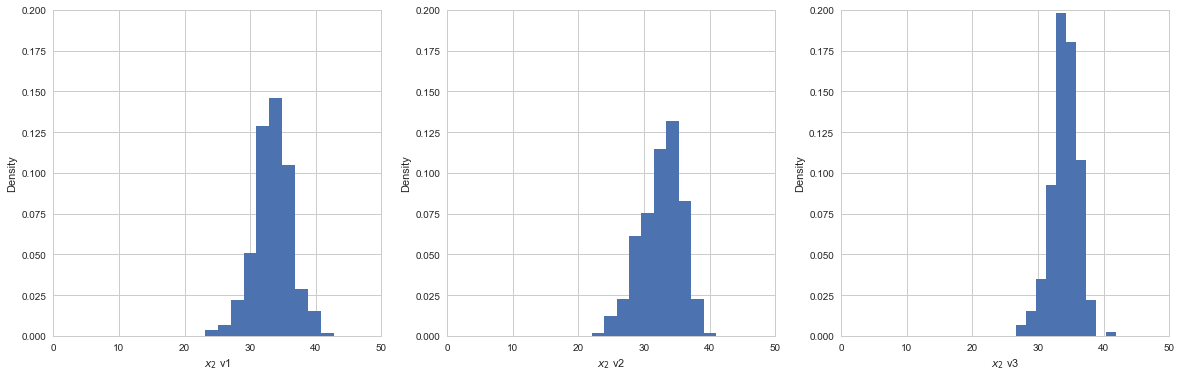

In [28]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.hist( data[ "x2v1"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_2$ v1")
axes.set_xlim([0, 50])
axes.set_ylim([0, 0.20])

axes = figure.add_subplot(1, 3, 2)
axes.hist( data[ "x2v2"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_2$ v2")
axes.set_xlim([0, 50])
axes.set_ylim([0, 0.20])

axes = figure.add_subplot(1, 3, 3)
axes.hist( data[ "x2v3"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_2$ v3")
axes.set_xlim([0, 50])
axes.set_ylim([0, 0.20])

plt.show()
plt.close()

So let's think about this. For **v1**, we have two processes that we *know* are somehow mixing. The canonical example is human height that is mixing two similar processes for men and women that different slightly. But in **v1**, the mean values are close enough or the dispersions large enough or the sample sizes too small so that we cannot see what we know to be true.

This has several lessons for EDA and statistical inference. As before, there may be a real effect that you're simply going to miss because you don't have enough data...and it may take way too much data to find the effect because the effect sizes are too small relative to each other.

This seems to be the case for all three (3) versions.

What you should ask yourself now is, under what circumstances can I see the effect differences? Let's start with increasing the data set sizes:

In [29]:
mu1 = 32.5
s1 = to_std( mu1, 0.10)
mu2 = 34.2
s2 = to_std( mu2, 0.05)

x2v1 = np.append( np.random.normal( mu1, s1, 1500), np.random.normal( mu2, s2, 1500))
x2v2 = np.append( np.random.normal( mu1, s1, 2500), np.random.normal( mu2, s2, 500))
x2v3 = np.append( np.random.normal( mu1, s1, 500), np.random.normal( mu2, s2, 2500))

data = pd.DataFrame({"x2v1": x2v1, "x2v2": x2v2, "x2v3": x2v3})

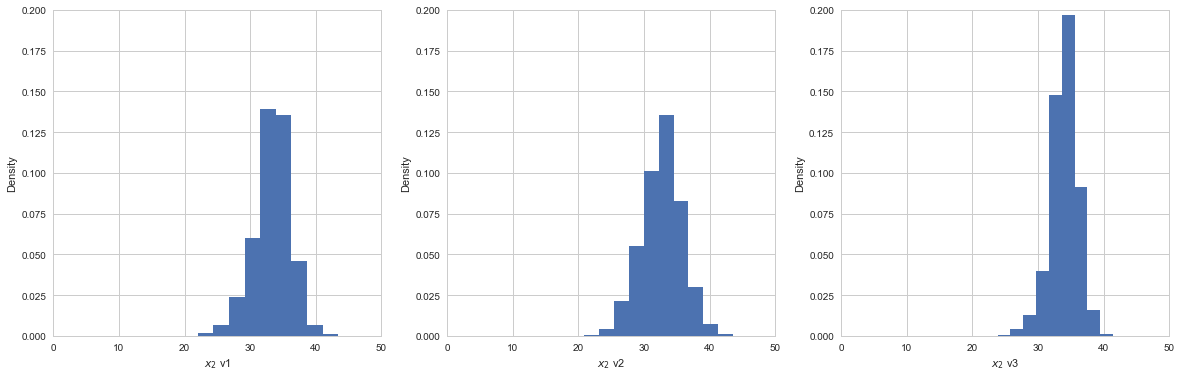

In [30]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.hist( data[ "x2v1"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_2$ v1")
axes.set_xlim([0, 50])
axes.set_ylim([0, 0.20])

axes = figure.add_subplot(1, 3, 2)
axes.hist( data[ "x2v2"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_2$ v2")
axes.set_xlim([0, 50])
axes.set_ylim([0, 0.20])

axes = figure.add_subplot(1, 3, 3)
axes.hist( data[ "x2v3"], normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_2$ v3")
axes.set_xlim([0, 50])
axes.set_ylim([0, 0.20])

plt.show()
plt.close()

That doesn't seem to make a difference at all. Are we looking at this the wrong way? Let's increase the number of bins:

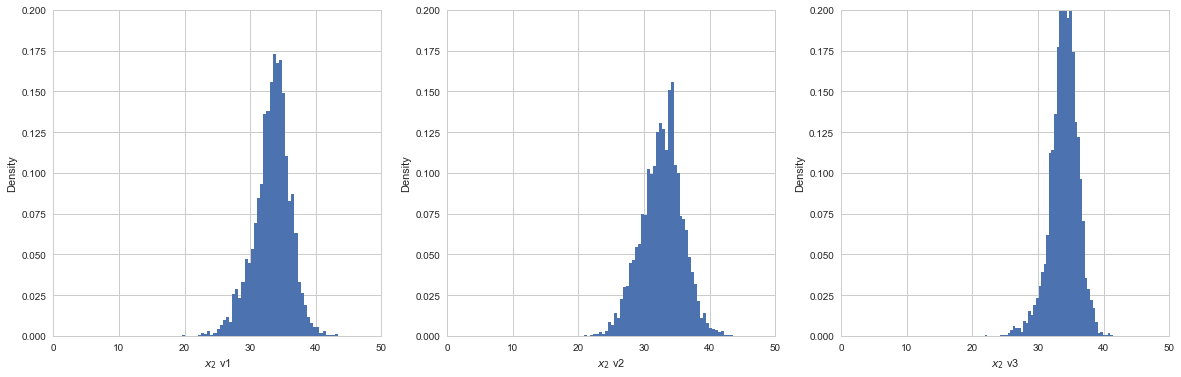

In [31]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.hist( data[ "x2v1"], normed=True, bins=50)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_2$ v1")
axes.set_xlim([0, 50])
axes.set_ylim([0, 0.20])

axes = figure.add_subplot(1, 3, 2)
axes.hist( data[ "x2v2"], normed=True, bins=50)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_2$ v2")
axes.set_xlim([0, 50])
axes.set_ylim([0, 0.20])

axes = figure.add_subplot(1, 3, 3)
axes.hist( data[ "x2v3"], normed=True, bins=50)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_2$ v3")
axes.set_xlim([0, 50])
axes.set_ylim([0, 0.20])

plt.show()
plt.close()

That doesn't seem to make much of a difference either. Let's think about this. The difference in the "true" means is 34.2 - 32.5 = 1.7. The standard deviation of the first group is 10% of 3.42 or 3.42. 66% of the data is going to be roughly within 2 standard deviations of the mean without resorting to any particular distribution.

So we have two possible problems with this experiment:

1. The effect size is too small relative to the dispersion.
2. The dispersion is too big relative to the effect size.

Let's make the effect size to be 10:

In [32]:
mu1 = 32.5
s1 = to_std( mu1, 0.10)
mu2 = 42.5
s2 = to_std( mu2, 0.05)

x2v1 = np.append( np.random.normal( mu1, s1, 1500), np.random.normal( mu2, s2, 1500))
x2v2 = np.append( np.random.normal( mu1, s1, 2500), np.random.normal( mu2, s2, 500))
x2v3 = np.append( np.random.normal( mu1, s1, 500), np.random.normal( mu2, s2, 2500))

data = pd.DataFrame({"x2v1": x2v1, "x2v2": x2v2, "x2v3": x2v3})

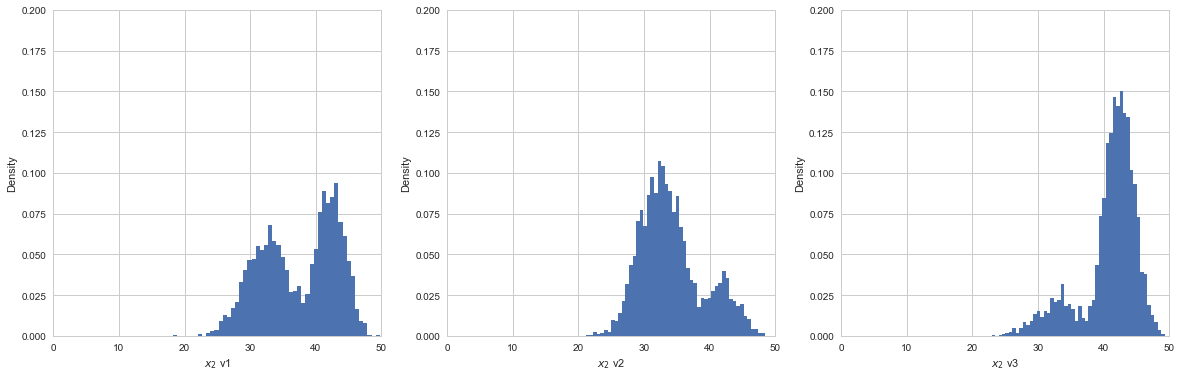

In [33]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.hist( data[ "x2v1"], normed=True, bins=50)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_2$ v1")
axes.set_xlim([0, 50])
axes.set_ylim([0, 0.20])

axes = figure.add_subplot(1, 3, 2)
axes.hist( data[ "x2v2"], normed=True, bins=50)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_2$ v2")
axes.set_xlim([0, 50])
axes.set_ylim([0, 0.20])

axes = figure.add_subplot(1, 3, 3)
axes.hist( data[ "x2v3"], normed=True, bins=50)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_2$ v3")
axes.set_xlim([0, 50])
axes.set_ylim([0, 0.20])

plt.show()
plt.close()

That's much better. In the first case, the sub-populations are equally represented. The effect size is perhaps a bit too pronounced because it's very large now.

The second and third cases are much more interesting because they show *real* cases of the kinds of things we thought we saw in $x1$. You have a variable with a nice bell shape and a hump on one side or the other. The shapes of the humps are determined by the relative sizes of the subpopulations and the dispersions of each variable.

This kind of "playing around" is exactly where these experiments should encourage you to go.

** Experiment 5\.**

Suppose you have two variables, $x_1$ and $x_2$, that are related. We can suppose they have a linear relationship characterized as follows:

$x_2 = 25.0 + 1.93 x_1 + \epsilon$

$x_1$ is normally distributed with $\mu= 7.5$ and $\sigma = 2.7$.

Additionally, there is random *noise* (other unknown factors) that we will call $\epsilon$ that is normally distributed with $\mu=0$ and $\sigma=1.5$. The steps to generate $x_2$ would be:

1. Generate $x_1$
2. Generate $\epsilon$
3. Combine $x_1$ and $\epsilon$ according to the formula above to create $x_2$.

Generate 1000 values of $x_1$ (and thus $\epsilon$ and $x_2$).

1. Calculate parameteric and non-parametric descriptive statistics as well as correlation coefficents for $x_1$ and $x_2$.
2. Plot histograms for $x_1$ and $x_2$
3. Plot box plots for $x_1$ and $x_2$.
3. Plot a Scatter plot for $x_1$ v. $x_2$.
4. Find out how to add a trendline to the plot.

In [34]:
np.random.seed([84758925])

Let's generate our data first:

In [35]:
x1 = np.random.normal( 7.5, 2.7, 1000)
e  = np.random.normal( 0, 1.5, 1000)
x2 = 25. + 1.93 * x1 + e

In [36]:
data = pd.DataFrame({"x1": x1, "x2": x2})

One thing that might trip you up is that $e$ is not observable. Let's `describe` the data:

In [37]:
data.describe()

,x1,x2
count,1000.000000,1000.000000
mean,7.523605,39.485658
std,2.735297,5.471262
min,-3.471656,18.657161
25%,5.615974,35.912399
50%,7.555200,39.628354
75%,9.338128,43.100224
max,16.079531,57.594404


Absent domain knowledge, there's nothing especially interesting here. There are a few things we can observe, though. First, $x_2$ is a linear transformation of $x_1$. A linear transformation of a variable preserves the general shape of the distribution. In this case, generally Normal stays generally Normal.

However, we can see that our coefficient of variation went from 0.365691489 with $x_1$ to 0.138551165 with $x_2$. Where does that come from?

Let's move to histograms:

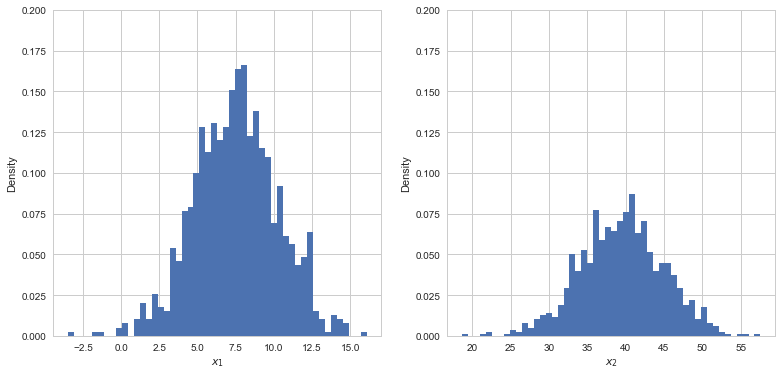

In [38]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.hist( data[ "x1"], normed=True, bins=50)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$")
#axes.set_xlim([0, 50])
axes.set_ylim([0, 0.20])

axes = figure.add_subplot(1, 3, 2)
axes.hist( data[ "x2"], normed=True, bins=50)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_2$")
#axes.set_xlim([0, 50])
axes.set_ylim([0, 0.20])

plt.show()
plt.close()

As you might have expected given the dispersion, number of observations, and our previous experiments, $x_1$ is very much representative of the Normal distribution of the underlying process. What might not have been so obvious is how spread out and flattened $x_2$ would be. Of course, as the result of a linear transformation (as we mentioned above), the general distributional shape is the same.

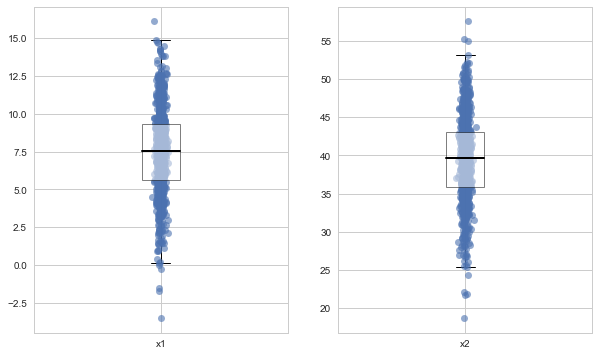

In [39]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 2, 1)

patch = axes.boxplot( data[ "x1"], labels=["x1"], patch_artist=True)
restyle_boxplot( patch)

x = np.random.normal(1, 0.01, size=len(data["x1"]))
axes.plot(x, data[ "x1"], 'o', alpha=0.6)
#axes.set_ylim([0, 60])

axes = figure.add_subplot(1, 2, 2)

patch = axes.boxplot( data[ "x2"], labels=["x2"], patch_artist=True)
restyle_boxplot( patch)

x = np.random.normal(1, 0.01, size=len(data["x2"]))
axes.plot(x, data[ "x2"], 'o', alpha=0.6)
#axes.set_ylim([0, 60])

plt.show()
plt.close()

Except to give us another view of the shape of the data, the box plot isn't particularly enlightening. One of the obstacles here is that synthetic data isn't as noisy as real data. Still, it's good practice and you'll be looking at real data soon enough.

We conclude with the correlation coefficients and scatter plot:

In [40]:
print( "pearsons=", stats.pearsonr( data["x1"], data["x2"])[0])
print( "spearman=", stats.spearmanr( data["x1"], data["x2"])[0])

pearsons= 0.962425416989
spearman= 0.958246198246


So there's no doubt that the relationship between the two variables is linear...this makes sense because we made $x_2$ linearly related to $x_1$. Additionally, our data are not particularly noisy. Let's see what a scatter plot does:

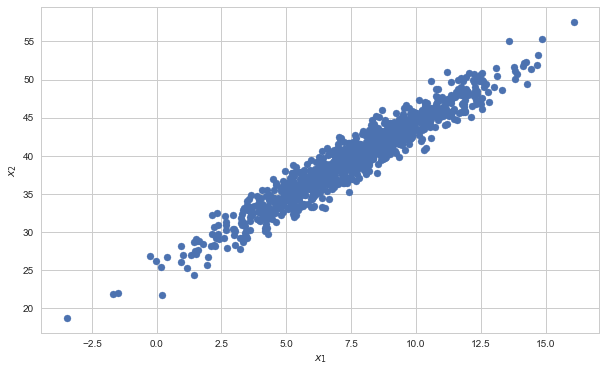

In [41]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( data[ "x1"], data["x2"])
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$")
axes.set_ylabel( r"$x_2$")

plt.show()
plt.close()

So we see a very tight linear relationship between $x_1$ and $x_2$. To see *why* and to think about how this might pertain to real data, you have to think about how we created the data set:

$x_2 = 25.0 + 1.93 * N(7.5, 2.7) + N(0, 1.5)$

We will talk *a lot* about regression later but for now it suffices to say that any *explicit* variable is a "known known" and everything under $e$ is an "known unknown" or "unknown unknown".

The base value is 25. You can think of $25.0$ and $N(0, 1.5)$ combining to be $N(25, 1.5)$ which is not a lot variability in the unknowns ("known" or "unknown"). To that we add about 15 on average (7.5 x 1.93) as a "known". There is just one $x_1$.

If we wanted to make the relationship noisier, we would have to increase the 1.5 in the calculation of $e$.

`matplotlib` focuses solely on drawing so if you want to add a regression line, you have to calculate it and plot it. For now, we will turn to `numpy` for that.

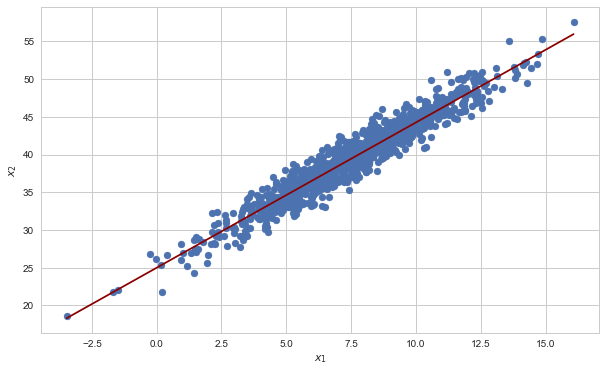

In [42]:
m, b = np.polyfit(data["x1"], data["x2"], 1)
xs = np.linspace(np.min(data["x1"]), np.max(data["x1"]), 100)

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( data[ "x1"], data["x2"])
axes.plot(xs, m*xs + b, color="darkred")

axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$")
axes.set_ylabel( r"$x_2$")

plt.show()
plt.close()

There are a number of things we could do to the previous experiment to complicate it (including combining them):

1. Increase or decrease $\epsilon$.
2. Increase or decrease the available data.
3. Assume there is a hidden variable, $x_3$ that is categorical (with only two values). The probability of $x_3=1$ is $p=0.39$. When $x_3=1$, then you have the equation above but when $x_3 = 0$ you have:

$x_2 = 25.0 - 4.21 x_1 + \epsilon$.

You should definitely try #1 at some point although we will revisit linear regression later in the semester.

**Experiment 6.**

Add $x_3$ as discussed above in #3 using the original $\epsilon$ and $n$ assuming you know $x_3$ and have the data. You will:

1. Generate 1000 values of $x_1$
2. Generate 1000 values of $x_3$
3. Generate 1000 values of $\epsilon$
4. Generate $x_2$ based on the two formulas.

Assuming $x_1$, $x_2$ and $x_3$ are your data set,

1. Calculate parameteric and non-parametric descriptive statistics as well as correlation coefficents for $x_1$ and $x_2$.
2. What is the frequency distribution of $x_3$?
3. Plot histograms for $x_1$ and $x_2$
4. Plot box plots for $x_1$ and $x_2$ as well as $x_2$ by value of $x_3$.
5. Plot a Scatter plot for $x_1$ v. $x_2$.
6. Find out how to add a trendline to the plot.


Alright let's do this again and create the data. There are a lot of ways to do this but probably the easiest is to create two data frames and then append them. We'll create $x_3 = 0$ first and then $x_3=1$.

With 1000 values, we know that 0.39 * 1000 of them should be 1. We could simulate this and it wouldn't be exactly right (because of randomness) but for this application, let's just do it the deterministic way. This means we need 390 values of $x_2$ where $x_3 = 1$ and 1000 - 390 = 610 values where $x_3 = 0$. 

We've already have the code for the second part:

In [43]:
x1_0 = np.random.normal( 7.5, 2.7, 610)
e_0  = np.random.normal( 0, 1.5, 610)
x2_0 = 25. + 1.93 * x1_0 + e_0

Now we can do the $x_3=1$ part where we subtract -1.93 instead of add:

In [44]:
x1_1 = np.random.normal( 7.5, 2.7, 390)
e_1  = np.random.normal( 0, 1.5, 390)
x2_1 = 25. - 1.93 * x1_1 + e_1

Now we just concatenate our data:

In [45]:
x1 = np.concatenate([x1_0, x1_1])
x2 = np.concatenate([x2_0, x2_1])

And generate the actual $x_3$ data:

In [46]:
x3 = np.array([0]*610 + [1]*390)

And put it in a Data Frame:

In [47]:
data = pd.DataFrame({"x1": x1, "x2": x2, "x3": x3})

As always we start with descriptive statistics:

In [48]:
data.describe()

,x1,x2,x3
count,1000.000000,1000.000000,1000.000000
mean,7.599982,28.204550,0.390000
std,2.584499,15.210278,0.487994
min,-1.467088,-6.622118,0.000000
25%,5.873720,12.493260,0.000000
50%,7.544494,35.314254,0.000000
75%,9.465450,40.681636,1.000000
max,14.764241,54.406374,1.000000


At least $x_3$ looks as we expect. It's not clear what we expect for $x_1$ and $x_2$. Let's see our histograms:

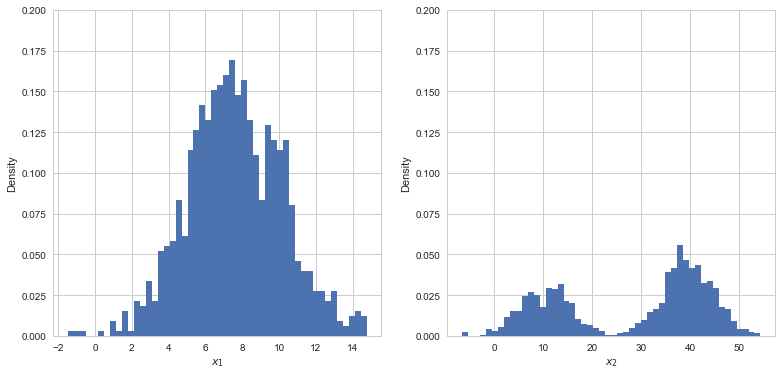

In [49]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.hist( data[ "x1"], normed=True, bins=50)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$")
#axes.set_xlim([0, 50])
axes.set_ylim([0, 0.20])

axes = figure.add_subplot(1, 3, 2)
axes.hist( data[ "x2"], normed=True, bins=50)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_2$")
axes.set_ylim([0, 0.20])

plt.show()
plt.close()

So $x_1$ is very Normal looking which isn't surprising because it comes straight from a Normal distribution. However, $x_2$ is definitely interesting and very bimodal. We'd want to investigate why that might be the case.

If we have domain knowledge, which we do, we can use it and do some box plots against $x_3$. If we did not know about $x_3$, we might move directly to scatter plots to see what was going on even if we couldn't identify $x_3$ with domain knowledge. And then if we did think "oh, what about $x_3$?" and we hadn't gotten the data, we'd need to go through ET all over again. The worst situation would be that we know about $x_3$ but didn't collect the data at all or cannot get it (data enrichment).

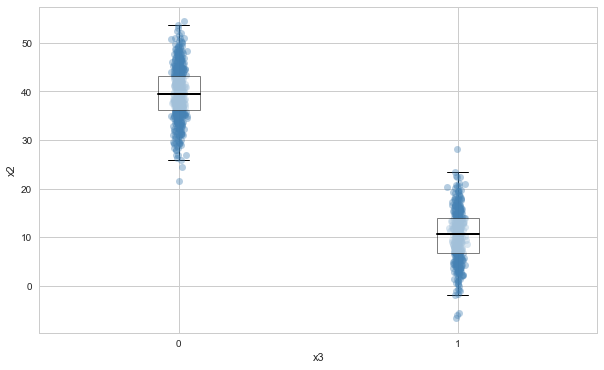

In [50]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.set_xlabel( "x3")
axes.set_ylabel( "x2")
grouped = data.groupby( "x3")

categories = pd.unique( data[ "x3"].values)
grouped_data = [grouped[ "x2"].get_group( k) for k in categories]
patch = axes.boxplot( grouped_data, labels=categories, patch_artist=True)
restyle_boxplot( patch)

for i, k in enumerate( categories):
    group = grouped[ "x2"].get_group( k)
    x = np.random.normal(i + 1, 0.01, size=len(group))
    axes.plot(x, group, 'o', alpha=0.4, color="steelblue")

plt.show()
plt.close()

This is basically the same thing we saw in the histogram *but* it confirms that $x_3$ is the factor that creates the bimodal distribution for $x_2$.

What would the correlation coefficients tell us?

In [51]:
print( "pearsons=", stats.pearsonr( data["x1"], data["x2"])[0])
print( "spearman=", stats.spearmanr( data["x1"], data["x2"])[0])

pearsons= 0.0567584850563
spearman= 0.202003750004


Interesting. There's no linear relationship between $x_1$ and $x_2$. What about the scatter plot? What do you think it looks like?

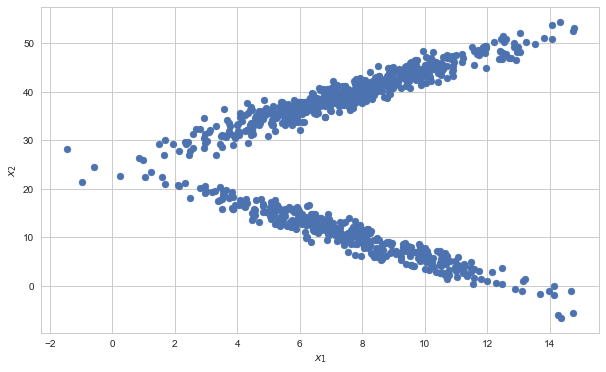

In [52]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( data[ "x1"], data["x2"])
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$")
axes.set_ylabel( r"$x_2$")

plt.show()
plt.close()

Surprised? The histograms definitely don't give you this information. Neither do the correlation coefficients.

These kinds of scatterplots are often one of the few times that color is effective for exploratory data analysis no matter what...if it's all a mess, that tells you something. If they're all neatly separated, that tells you something. (Can you make an example of the first case?)

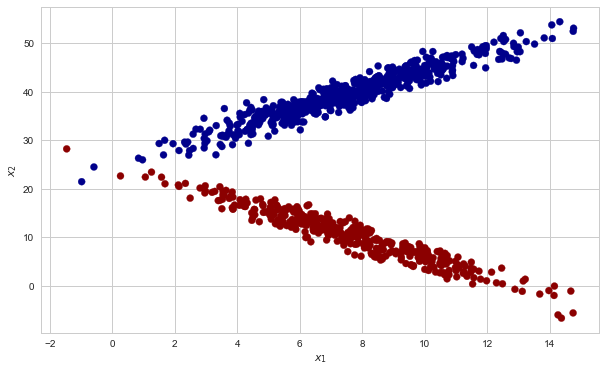

In [53]:
figure = plt.figure(figsize=(10, 6))

colors = ["darkred" if x == 1 else "darkblue" for x in data["x3"]]

axes = figure.add_subplot(1, 1, 1)
axes.scatter( data[ "x1"], data["x2"], color=colors)
axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$")
axes.set_ylabel( r"$x_2$")

plt.show()
plt.close()

Let's wrap it up by adding some trend lines.

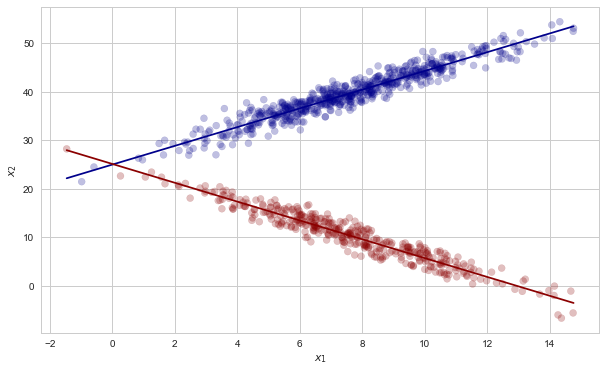

In [54]:
data_1 = data[x3 == 1]
m1, b1 = np.polyfit(data_1["x1"], data_1["x2"], 1)
data_0 = data[x3 == 0]
m0, b0 = np.polyfit(data_0["x1"], data_0["x2"], 1)

xs = np.linspace(np.min(data["x1"]), np.max(data["x1"]), 100)

figure = plt.figure(figsize=(10, 6))

colors = ["darkred" if x == 1 else "darkblue" for x in data["x3"]]

axes = figure.add_subplot(1, 1, 1)
axes.scatter( data[ "x1"], data["x2"], alpha=0.25, color=colors)
axes.plot(xs, m0*xs + b0, color="darkblue")
axes.plot(xs, m1*xs + b1, color="darkred")

axes.set_ylabel( "Density")
axes.set_xlabel( r"$x_1$")
axes.set_ylabel( r"$x_2$")

plt.show()
plt.close()

## Lab Discussion

1. Can you think of a general strategy for Exploratory Data Analysis that isn't simply "by rote" (Hint: is there a decision tree for examining a variable?)?
2. What are the pros and cons of making your own library of helper functions for EDA?

*answer on the discussion boards*

## On Your Own

You should have enough information now to generate all kinds of problems involving:

1. different distributions (continuous and discrete, numerical and categorical).
2. different parameterizations.
3. different variability.
4. different amounts of data.
5. mixtures of all of the above.

You should try to outwit yourself. Can you create data sets that require every tool to fully understand?